**Лабораторна робота 1.**

Основи обробки зображень на мові програмування Python

**Мета**: вивчити основи роботи з растровими зображеннями на мові Python.

**Середовище розробки**: Google Colaboratory.

**Завдання**

Для довільного растрового зображення виконайте наступні операції:
- вирізання фрагменту зображення заданого розміру;
- зміна розміру та поворот зображення;
- перетворення повнокольорового на відтінки сірого;
- нанесення точок, ліній, налаштування стилів їх відображення;
-	побудова та відображення гістограми;
-	заміна значень рядка 25 значеннями рядка 50;
-	заміна всіх значень у стовпці 75 на 200;
-	розрахунок суми значень перших 50 рядків і 50 стовпців;
-	розрахунок середнього значення рядка 50;
-	вивід значень третього з кінця стовпеця;
-	еквілізація гістрограми.

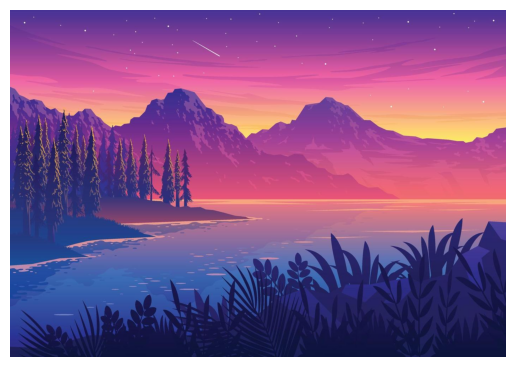

In [11]:
from PIL import Image
from matplotlib import pyplot as plt
def display(im, cmap=None):
  plt.imshow(im, cmap=cmap)
  plt.axis("off")
  plt.show()
im=Image.open('example.jpg')
display(im)

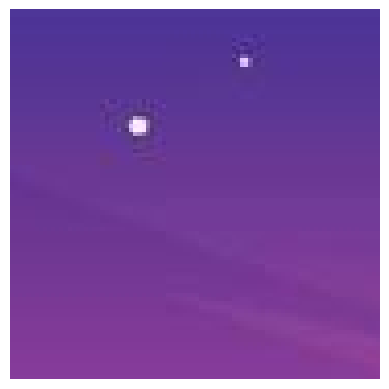

In [12]:
# ⦁	вирізання фрагменту зображення заданого розміру;
box=(10,10,100,100)
region=im.crop(box)
display(region)

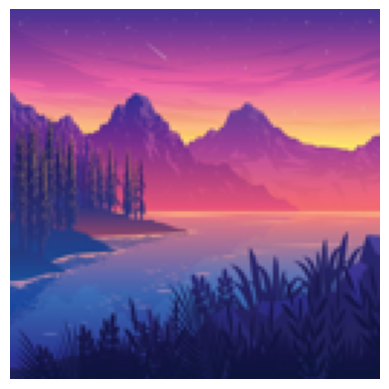

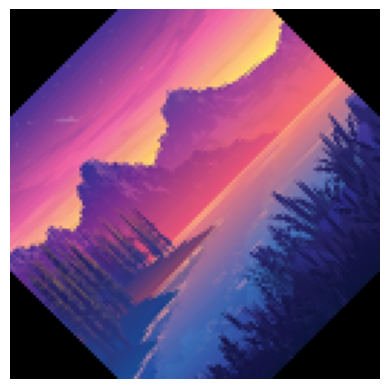

In [13]:
# ⦁	зміна розміру та поворот зображення;
# Resize the image to 128x128 pixels
resized_image = im.resize((128, 128))

# Rotate the image by 45 degrees
rotated_image = resized_image.rotate(45)
display(resized_image)
display(rotated_image)

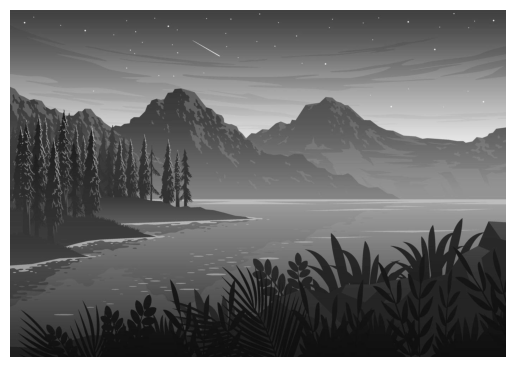

In [14]:
# ⦁	перетворення повнокольорового на відтінки сірого;
gray_im = im.convert('L')
display(gray_im, cmap='gray')

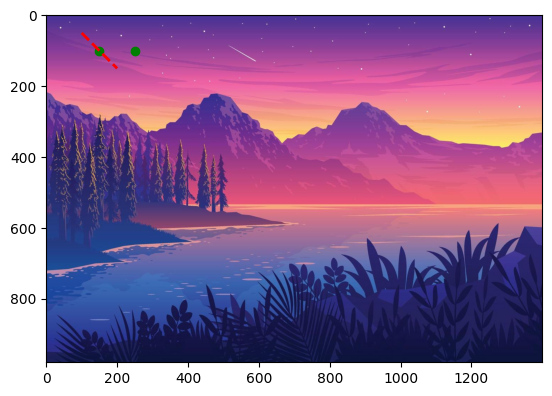

In [15]:
# ⦁	нанесення точок, ліній, налаштування стилів їх відображення;
plt.imshow(im)
plt.plot([100, 200], [50, 150], 'r--', linewidth=2)  # Червона пунктирна лінія
plt.scatter([150, 250], [100, 100], color='green', marker='o')  # Зелені круги
plt.show()

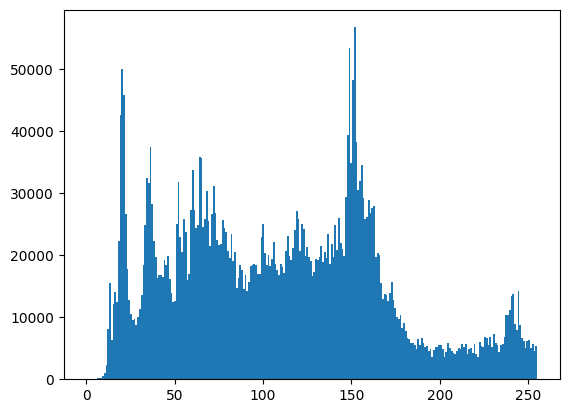

In [28]:
# ⦁	побудова та відображення гістограми;
from pylab import *
img_array = np.array(im)
counts = hist(img_array.flatten(), 256)

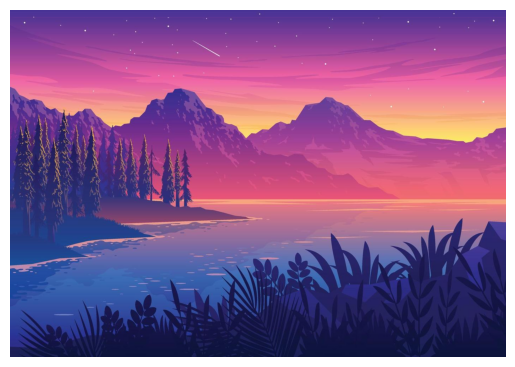

In [29]:
# ⦁	заміна значень рядка 25 значеннями рядка 50;
img_array = np.array(im)
img_array[24, :] = img_array[49, :]

In [30]:
# ⦁	заміна всіх значень у стовпці 75 на 200;
img_array[:, 74] = 200

In [31]:
# ⦁	розрахунок суми значень перших 50 рядків і 50 стовпців;
sum_first = np.sum(img_array[:50, :50])
print("Сума перших 50x50 пікселів:", sum_first)

Сума перших 50x50 пікселів: 728004


In [32]:
# ⦁	розрахунок середнього значення рядка 50;
mean_row = np.mean(img_array[49, :])
print("Середнє значення рядка 50:", mean_row)

Середнє значення рядка 50: 103.21357142857143


In [33]:
# ⦁	вивід значень третього з кінця стовпеця;
values = img_array[:, -3]
print("Третій з кінця стовпець:", values)

Третій з кінця стовпець: [[ 72  52 149]
 [ 72  52 149]
 [ 72  52 149]
 ...
 [ 12  20  59]
 [ 12  20  59]
 [ 12  20  59]]


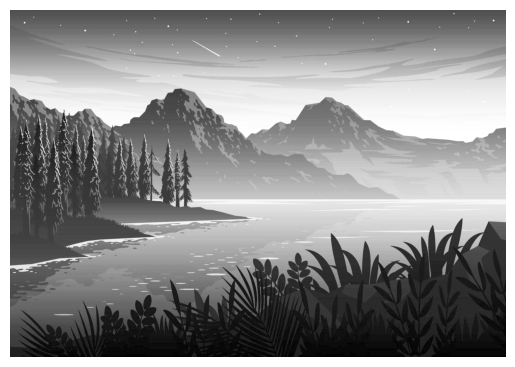

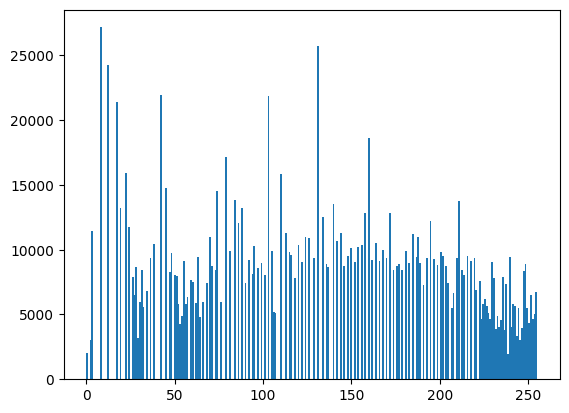

In [43]:
# ⦁	еквілізація гістрограми.
def histogram_equalization(img_array):
    histogram, bins = np.histogram(img_array.flatten(), 256)
    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]
    img_equalized = np.interp(img_array.flatten(), bins[:-1], cdf)
    return img_equalized.reshape(img_array.shape)

gray_img_array = np.array(gray_im)
img_equalized = histogram_equalization(gray_img_array)
display(img_equalized, cmap='gray')
counts = hist(img_equalized.flatten(), 256)

**Висновки**:

У ході роботи ми набули навичок роботи із зображеннями у Python, завдяки бібліотекам PIL, matplotlib. Було здійснено прості маніпуляції із зображеннями, такі як поворот, заміна значення пікселів, переставляння рядків, сумування, пошук середнього по групі пікселів, тощо. Також було побудовано гістограму частот пікселів та здійснено еквалізацію.
